In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("sales_data.db")

conn.executescript("""
DROP TABLE IF EXISTS sales;
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);

INSERT INTO sales (product, quantity, price) VALUES
('Laptop', 3, 899.99),
('Headphones', 10, 49.99),
('Mouse', 7, 19.99),
('Keyboard', 5, 59.99),
('Monitor', 2, 199.99),
('Laptop', 1, 899.99),
('Mouse', 8, 24.99),
('Headphones', 4, 79.99);
""")

conn.commit()

In [3]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""

df = pd.read_sql_query(query, conn)

In [4]:
print("=== Sales Summary ===")
print(df)

=== Sales Summary ===
      product  total_qty  revenue
0      Laptop          4  3599.96
1  Headphones         14   819.86
2     Monitor          2   399.98
3       Mouse         15   339.85
4    Keyboard          5   299.95


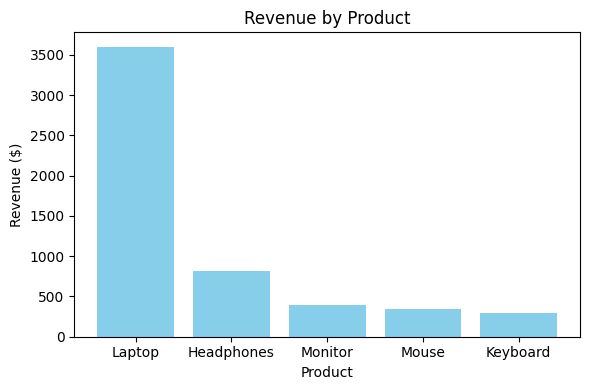

In [5]:
plt.figure(figsize=(6, 4))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

In [6]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>

In [7]:
conn.close()